Q1

In [12]:
columns = {
    "a": "b",
    "b": "w",
    "c": "b",
    "d": "w",
    "e": "b",
    "f": "w",
    "g": "b",
    "h": "w"
}
position = input("position?")
if(columns[position[0:1]] == "b"):
    if(int(position[1:2])%2 == 0):
        print("white")
    else:
        print("black")
else:
    if(int(position[1:2])%2 == 0):
        print("black")
    else:
        print("white")

white


Q2

In [1]:
def maximum(list1):
    return max(list1, key=lambda arr: len(arr))

def minium(list1):
    return min(list1, key=lambda arr: len(arr))

list1=[[0], [1, 3], [5, 7], [9, 11], [13, 15, 17]]
max=maximum(list1)
print(str(len(max)), str(max))
min=minium(list1)
print(str(len(min)), str(min))

3 [13, 15, 17]
1 [0]


Q3

In [5]:
class Employee:
    def __init__(self, emp_name, emp_id, emp_salary, emp_department):
        self.emp_name = emp_name
        self.emp_id = emp_id
        self.emp_salary = emp_salary
        self.emp_department = emp_department
    
    def calculate_emp_salary(self, hours_worked):
        # You can add any logic here to calculate salary
        return self.emp_salary if hours_worked<=50 else self.emp_salary+((hours_worked-50)*self.emp_salary/50)
    
    def assign_department(self, new_department):
        self.emp_department = new_department
    
    def print_employee_details(self):
        print("Employee Name:", self.emp_name)
        print("Employee ID:", self.emp_id)
        print("Employee Salary:", self.emp_salary)
        print("Employee Department:", self.emp_department)
        print()

lewis=Employee("LEWIS", "MER44", 35000, "RESEARCH")
max=Employee("MAX", "RBU01", 55000, "SALES")
charles=Employee("CHARLES", "FER16", 24000, "ACCOUNTING")
pierre=Employee("PIERRE", "ALP010", 5000, "OPERATIONS")

lewis.assign_department("HOUSE_KEEPING")
lewis.print_employee_details()
print(lewis.calculate_emp_salary(60))


Employee Name: LEWIS
Employee ID: MER44
Employee Salary: 35000
Employee Department: HOUSE_KEEPING

42000.0


Q4

In [10]:
from forex_python.converter import CurrencyRates
from datetime import datetime
from statsmodels.tsa.stattools import adfuller, kpss
import pandas as pd

currency = CurrencyRates()
df = pd.DataFrame(pd.date_range(start='1/1/2019', end='12/31/2019', freq='M'),columns=["DateTime"])
df["Rates"] = df["DateTime"].apply(lambda x: currency.get_rate("USD","CAD",x))

def adf_test(x):
    '''
    Function for performing the Augmented Dickey-Fuller test for stationarity

    Null Hypothesis: time series is not stationary
    Alternate Hypothesis: time series is stationary

    Parameters
    ----------
    x : pd.Series / np.array
        The time series to be checked for stationarity

    Returns
    -------
    results: pd.Series
        A Series with the ADF test's results
    '''

    indices = ['Test Statistic', 'p-value',
               '# of Lags Used', '# of Observations Used']

    # Perform the ADF test
    adf_test = adfuller(x, autolag='AIC')

    # Use a pandas Series to store the ADF test result and add row names
    results = pd.Series(adf_test[0:4], index=indices) # the first four items `adf_test` returned: test statistic, p-value, # of lags used,# of observations used

    # Change the row names of the critical values
    for key, value in adf_test[4].items(): # the fifth item `adf_test` returned: critical values
        # Add a new row in pandas Series results
        results[f'Critical Value ({key})'] = value

    return results

print(df["Rates"])

C:\Users\HL LEE\AppData\Local\Temp\ipykernel_5944\132906956.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = pd.DataFrame(pd.date_range(start='1/1/2019', end='12/31/2019', freq='M'),columns=["DateTime"])


ConnectTimeout: HTTPSConnectionPool(host='theforexapi.com', port=443): Max retries exceeded with url: /api/2019-01-31?base=USD&symbols=CAD&rtype=fpy (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x00000130164DA4D0>, 'Connection to theforexapi.com timed out. (connect timeout=None)'))

Q5

In [9]:
from prophet import Prophet
from statsmodels.tsa.seasonal import seasonal_decompose
import requests
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
from matplotlib import pyplot as plt
import scipy.stats as scs
from chapter_3_utils import test_autocorrelation
import seaborn as sns
import pmdarima as pm
COLORS = [plt.cm.cubehelix(x) for x in [0.1, 0.3, 0.5, 0.7]]

In [2]:


url = "https://data.nasdaq.com/api/v3/datasets/FRED/UNRATE.json?api_key=a_rjPxx3BtETWzqDGbC7"

r = requests.get(url)
UNRATES = r.json()
UNRATE_df = pd.DataFrame(columns=["ds","y"])
# print(UNRATES['dataset']['data'])
for UNRATE in UNRATES['dataset']['data']:
  d={'ds' : [UNRATE[0]], 'y' : [UNRATE[1]]}
  UNRATE_df = pd.concat([UNRATE_df, pd.DataFrame(d)], ignore_index=True)


C:\Users\HL LEE\AppData\Local\Temp\ipykernel_39940\3173471690.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  UNRATE_df = pd.concat([UNRATE_df, pd.DataFrame(d)], ignore_index=True)


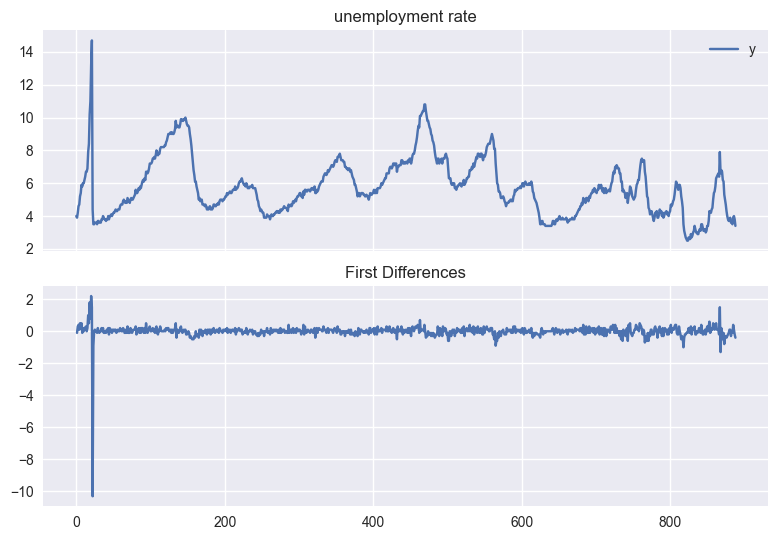

In [3]:
UNRATE_df_diff = UNRATE_df['y'].diff().dropna()

fig, ax = plt.subplots(2, sharex=True)
UNRATE_df.plot(title = "unemployment rate", ax=ax[0]) # plot the original price on the first subplot
UNRATE_df_diff.plot(title='First Differences',ax=ax[1]) # plot the first differencing price on the second subplot

plt.tight_layout()
plt.show()

Remarks:

In the above plot, we can see a more or less linear trend in unemployment rate, which indicates non-stationarity.

ADF test statistic: -9.06 (p-val: 0.00)
KPSS test statistic: 0.04 (p-val: 0.10)


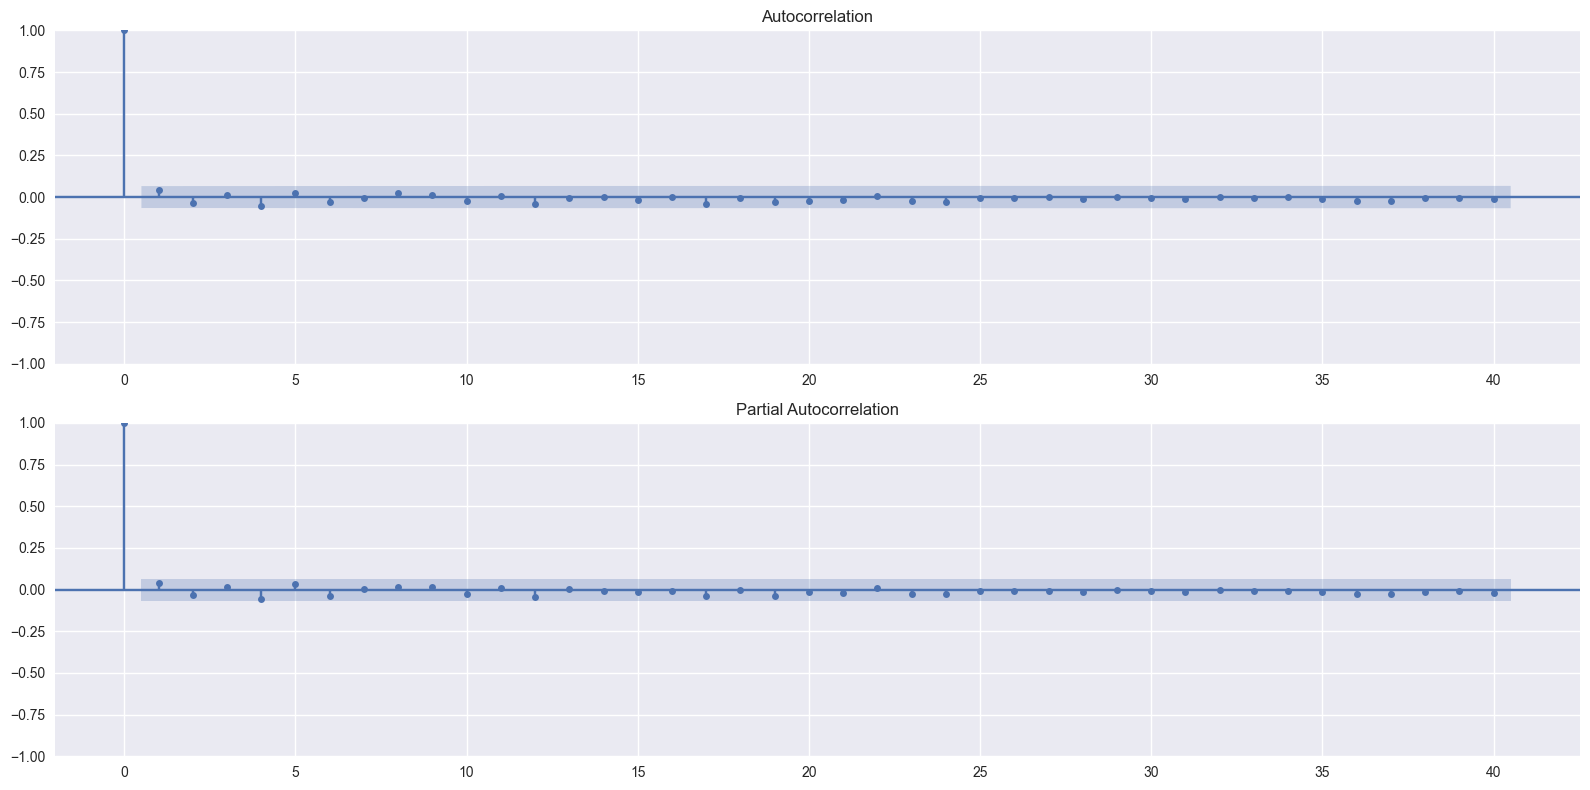

In [4]:
fig = test_autocorrelation(UNRATE_df_diff) # Use the help function `test_autocorrelation`

plt.tight_layout()
plt.show()

Remarks:

The results indicate that the differenced prices are stationary. So the order of integration was d=1.

As the last lag after the PACF function did not cross the confidence interval, the suggested lag order (p) was p=0.

Analogically, for the moving average order, we looked at the ACF plot to determine q=1.

Hence, the model should be ARIMA(0,1,1).

In [5]:
arima = ARIMA(UNRATE_df['y'], order=(0, 1, 1)).fit()
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  889
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -491.316
Date:                Sat, 24 Feb 2024   AIC                            986.632
Time:                        00:55:41   BIC                            996.210
Sample:                             0   HQIC                           990.293
                                - 889                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0451      0.027      1.690      0.091      -0.007       0.097
sigma2         0.1770      0.001    134.716      0.000       0.174       0.180
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           6355680.76
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.15   Skew:                           -16.55
Prob(H) (two-sided):                  0.00   Kurtosis:                       416.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [7]:
# Prepare a function for diagnosing the fit of the model based on its residuals
def arima_diagnostics(resids, n_lags=40):
    '''
    Function for diagnosing the fit of an ARIMA model by investigating the residuals.

    Parameters
    ----------
    resids : np.array
        An array containing the residuals of a fitted model
    n_lags : int
        Number of lags for autocorrelation plot

    Returns
    -------
    fig : matplotlib.figure.Figure
        Created figure
    '''

    # create a figure and a placeholder subplots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

    r = resids
    # calculate the standardized residuals
    resids = (r - np.nanmean(r)) / np.nanstd(r)
    resids_nonmissing = resids[~(np.isnan(resids))]

    # plot residuals over time
    sns.lineplot(x=np.arange(len(resids)), y=resids, ax=ax1)
    ax1.set_title('Standardized residuals')

    # normal distribution
    x_lim = (-1.96 * 2, 1.96 * 2)
    r_range = np.linspace(x_lim[0], x_lim[1]) # generate a sequence of 50 numbers (by default) evenly spaced over the interval
    # probability density function evaluated at x and return a 1d-array
    norm_pdf = scs.norm.pdf(r_range)

    # plot distribution of residuals
    sns.distplot(resids_nonmissing, hist=True, kde=True, # plot a normed histogram and a gaussian kernel density estimate
                 norm_hist=True, ax=ax2)
    # plot normal distribution
    ax2.plot(r_range, norm_pdf, 'g', lw=2, label='N(0,1)') # 'g' means color green  `lw` means linewidth
    ax2.set_title('Distribution of standardized residuals') # set the title
    ax2.set_xlim(x_lim) # set the x-axis view limits
    ax2.legend() # place a legend on the axes

    # Q-Q plot
    qq = sm.qqplot(resids_nonmissing, line='s', ax=ax3) #line='s': standardized line
    ax3.set_title('Q-Q plot')

    # ACF plot
    plot_acf(resids, ax=ax4, lags=n_lags, alpha=0.05) # alpha: significance level
    ax4.set_title('ACF plot')

    return fig

C:\Users\HL LEE\AppData\Local\Temp\ipykernel_39940\2588009375.py:38: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resids_nonmissing, hist=True, kde=True, # plot a normed histogram and a gaussian kernel density estimate


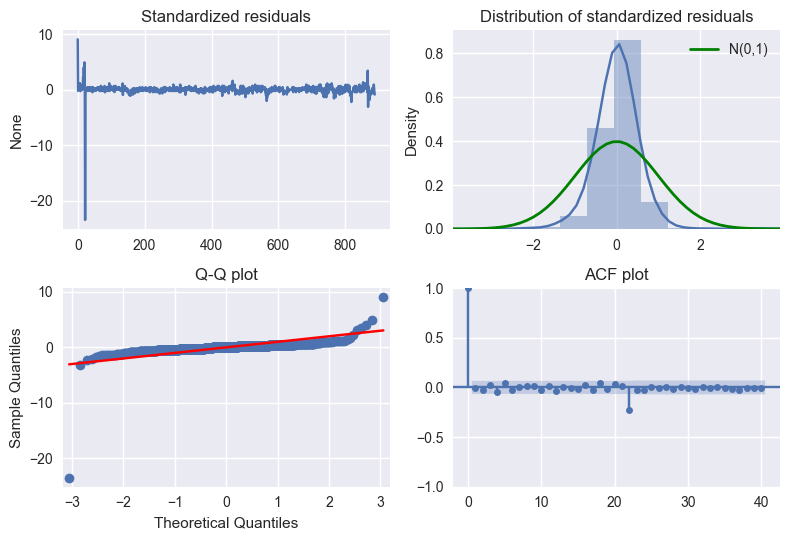

In [8]:
# Test the residuals of the fitted ARIMA model using the function we defined earlier
arima_diagnostics(arima.resid, 40)
plt.tight_layout()
plt.show()

If the fit is good, the residuals should be similar to the white noise.

The distribution of the standardized residuals does resemble the Normal distribution.

The average of the residuals is close to 0 (-0.05), and inspecting the ACF plot leads to the conclusion that the residuals are not correlated. These two characteristics speak in favor of a good fit.

However, the tails of the distribution are slightly thinner than under normality, which we can observe in the Q-Q plot.

In [12]:
auto_arima = pm.auto_arima(UNRATE_df['y'],
                           error_action='ignore', # If unable to fit an `ARIMA` for whatever reason, it will ignores errors
                           suppress_warnings=True,
                           seasonal=True,
                           n_jobs=-1) # `seasonal`: whether to fit a seasonal ARIMA, we exclude potential seasonality
auto_arima.summary()

c:\Users\HL LEE\AppData\Local\Programs\Python\Python310\lib\site-packages\pmdarima\arima\_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  889
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -488.940
Date:                Sat, 24 Feb 2024   AIC                            983.881
Time:                        01:00:14   BIC                            998.248
Sample:                             0   HQIC                           989.372
                                - 889                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7803      0.220     -3.542      0.000      -1.212      -0.348
ma.L1          0.8336      0.208      4.006      0.000       0.426       1.241
sigma2         0.1761      0.001    134.403      0.000       0.174       0.179
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):           5992212.05
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.16   Skew:                           -16.17
Prob(H) (two-sided):                  0.00   Kurtosis:                       404.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
n_forecasts = len(UNRATE_df)

# obtain forecasts from the models that were fitted using `statsmodels`
arima_pred = arima.get_forecast(n_forecasts) # specify the length of the forecast

# create a list containing two pd.Dataframe which store forecasts and confidence intervals
arima_pred = [arima_pred.predicted_mean, arima_pred.conf_int(alpha=0.05)]

# # Concatenate the two Dataframes horizontally along the axis 1
arima_pred = pd.concat(arima_pred, axis=1).set_index(UNRATE_df.index)  # set the new DataFrame index same as the test index

arima_pred.rename(columns={'predicted_mean': 'prediction', 'lower adj_close': 'ci_lower', 'upper adj_close': 'ci_upper'}, inplace = True)

arima_pred

,prediction,lower y,upper y
0,3.382368,2.557673,4.207062
1,3.382368,2.189473,4.575262
2,3.382368,1.910677,4.854059
3,3.382368,1.676862,5.087874
4,3.382368,1.471444,5.293291
...,...,...,...
884,3.382368,-22.257113,29.021849
885,3.382368,-22.271596,29.036332
886,3.382368,-22.286071,29.050806
887,3.382368,-22.300538,29.065273


In [13]:
# Use the predict method
a, b = auto_arima.predict(n_periods=n_forecasts, #specify the number of periods that we wanted to forecast for.
                                     return_conf_int=True, # `return_conf_int`: Whether to get the confidence intervals of the forecasts.
                                     alpha=0.05) # 'alpha': The confidence intervals for the forecasts are (1 - alpha) %


# # # create a list containing two pd.Dataframe which store forecasts and confidence intervals
auto_arima_pred = [pd.DataFrame(a,
                                 columns=['prediction']),
                    pd.DataFrame(b,
                                 columns=['ci_lower', 'ci_upper'], index=a.index)]

auto_arima_pred

#auto_arima_pred = pd.concat(a,b)
# Concatenate the two Dataframes horizontally along the axis 1
auto_arima_pred = pd.concat(auto_arima_pred, axis=1).set_index(UNRATE_df.index) # set the new DataFrame index same as the test index

auto_arima_pred

,prediction,ci_lower,ci_upper
0,3.369480,2.547000,4.191961
1,3.393294,2.198699,4.587888
2,3.374713,1.918868,4.830558
3,3.389211,1.698919,5.079502
4,3.377899,1.491283,5.264514
...,...,...,...
884,3.382857,-21.817903,28.583616
885,3.382857,-21.832137,28.597850
886,3.382857,-21.846363,28.612076
887,3.382857,-21.860581,28.626295


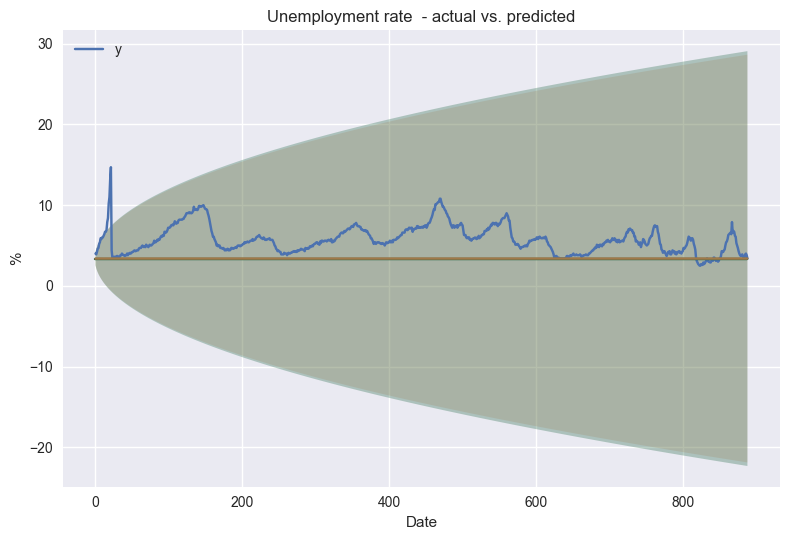

In [16]:
# Plot the results
fig, ax = plt.subplots(1)

# plot the line of the actual test value
ax = sns.lineplot(data=UNRATE_df, color=COLORS[0])

# plot the arima prediction value
ax.plot(arima_pred.prediction, c=COLORS[1])

#fill between two sets of y-values: arima_pred.ci_lower and arima_pred.ci_upper
ax.fill_between(arima_pred.index,
                 arima_pred["lower y"],
                 arima_pred["upper y"],
                 alpha=0.3,  # with 30% opacity
                 facecolor=COLORS[1])

# plot the auto_arima prediction value
ax.plot(auto_arima_pred.prediction, c=COLORS[2])

# fill between two sets of y-values: auto_arima_pred.ci_lower and auto_arima_pred.ci_upper
ax.fill_between(auto_arima_pred.index,
                auto_arima_pred.ci_lower,
                auto_arima_pred.ci_upper,
                alpha=0.2,  # with 20% opacity
                facecolor=COLORS[2])

# add the title and axis labels
ax.set(title="Unemployment rate  - actual vs. predicted",
       xlabel='Date',
       ylabel='%')
ax.legend(loc='upper left') # `loc`: The location of the legend. {'upper left', 'upper right', 'lower left', 'lower right'}
                            # place the legend at the corresponding corner of the axes/figure.

plt.tight_layout()
plt.show()